In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EDA_data = pd.read_csv(r'D:\DS_Final_Project\Notebook\data\Merged_data\master_data.csv')
pd.set_option('display.max_columns',None)
EDA_data.head()

,customer_id,first_name,last_name,email,address_id,address_status_id,street_number,street_name,city,country_id,address_status,order_id,order_date,shipping_method_id,dest_address_id,order_day,order_month,order_year,order_month_name,method_name,cost,history_id,status_id,status_date,hist_status_day,hist_status_month,hist_status_year,order_status_id,status_value,line_id,book_id,price,price_missing,cost_missing,title,isbn13,language_id,num_pages,publication_date,publisher_id,publish_day,publish_month,publish_year,author_id,author_name,language_code,language_name,publisher_name,last_order_date,recency,spending_of_customer,total_no_of_order,has_order,Churn
0,1,ursola,purdy,upurdy0@cdbaby.com,359,1,9923,merrick center,kiuruvesi,69,active,1213,2023-02-07,4,359,7,2,2023,february,international,24,1212,1,2023-02-07 21:20:42,7,2.0,2023,1,order received,1,6476,13,0,0,1213,9780712664561,1,640,2004-02-05,1539,5,2,2004,231,alison weir,eng,english,pimlico,2023-02-07,685,180,46,1,1
1,1,ursola,purdy,upurdy0@cdbaby.com,359,1,9923,merrick center,kiuruvesi,69,active,1213,2023-02-07,4,359,7,2,2023,february,international,24,1212,1,2023-02-07 21:20:42,7,2.0,2023,1,order received,11109,735,3,0,0,1213,9780064403368,1,288,2001-05-08,882,8,5,2001,5112,laurence yep,eng,english,harpercollins,2023-02-07,685,180,46,1,1
2,1,ursola,purdy,upurdy0@cdbaby.com,359,1,9923,merrick center,kiuruvesi,69,active,1213,2023-02-07,4,359,7,2,2023,february,international,24,1212,1,2023-02-07 21:20:42,7,2.0,2023,1,order received,16232,611,2,0,0,1213,9780061015618,1,384,2003-10-28,160,28,10,2003,8066,shirley rousseau murphy,eng,english,avon,2023-02-07,685,180,46,1,1
3,1,ursola,purdy,upurdy0@cdbaby.com,359,1,9923,merrick center,kiuruvesi,69,active,1213,2023-02-07,4,359,7,2,2023,february,international,24,12860,2,2023-02-08 05:30:06,8,2.0,2023,2,pending delivery,1,6476,13,0,0,1213,9780712664561,1,640,2004-02-05,1539,5,2,2004,231,alison weir,eng,english,pimlico,2023-02-07,685,180,46,1,1
4,1,ursola,purdy,upurdy0@cdbaby.com,359,1,9923,merrick center,kiuruvesi,69,active,1213,2023-02-07,4,359,7,2,2023,february,international,24,12860,2,2023-02-08 05:30:06,8,2.0,2023,2,pending delivery,11109,735,3,0,0,1213,9780064403368,1,288,2001-05-08,882,8,5,2001,5112,laurence yep,eng,english,harpercollins,2023-02-07,685,180,46,1,1


In [2]:
EDA_data['customer_id'].nunique()

2000

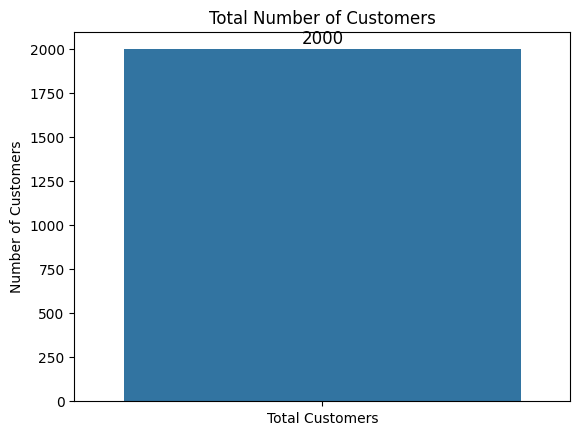

In [3]:
# Finding total number of customer:

# Calculate total number of unique customers
Total_cust = EDA_data['customer_id'].nunique()

# Create a single-element DataFrame for plotting
sns.barplot(x=['Total Customers'], y=[Total_cust])

# Add labels and title
plt.ylabel('Number of Customers')
plt.title('Total Number of Customers')

# Add text annotation on top of the bar
plt.text(x=0, y=Total_cust + 10, s=str(Total_cust), ha='center', va='bottom', fontsize=12, color='black')

# Show the plot
plt.show()

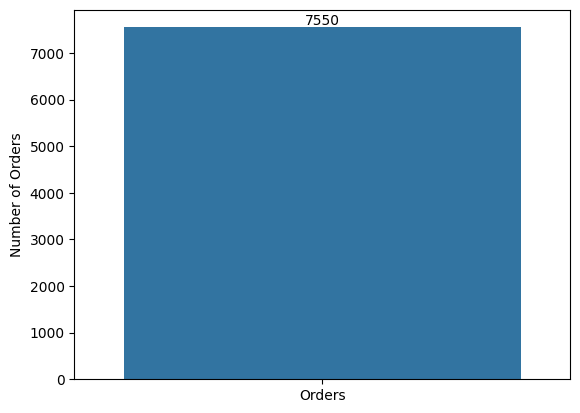

In [4]:
# total number of order
order_num = EDA_data['order_id'].nunique()

sns.barplot(x=['Orders'], y=order_num)
plt.ylabel("Number of Orders")
plt.text(x=0,y=order_num,s=str(order_num),ha = 'center',va='bottom')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26800\2772591148.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='customer_id',y='total_no_of_order',data=top_customers,palette='viridis',order=top_customers['customer_id'])


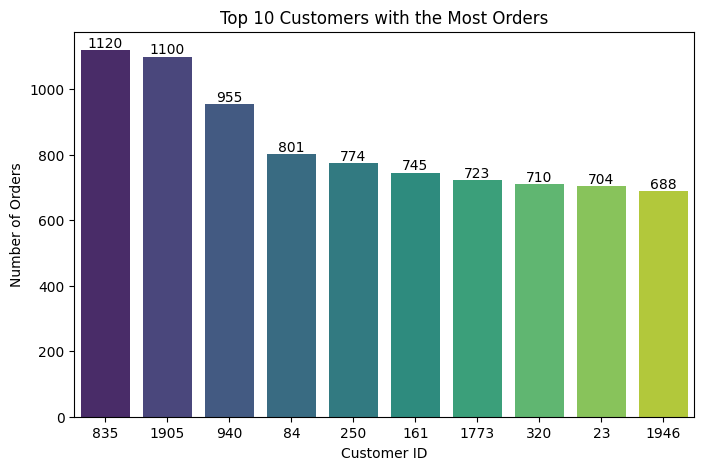

In [5]:
# Top 10 customer with most orders

top_customers = EDA_data.groupby('customer_id')['total_no_of_order'].count()

top_customers = top_customers.sort_values(ascending=False).head(10).reset_index()
# Create a figure and axis
plt.figure(figsize=(8, 5))

sns.barplot(x='customer_id',y='total_no_of_order',data=top_customers,palette='viridis',order=top_customers['customer_id'])

# Adding the numerical values on top of the bars
for i in range(len(top_customers)):
    plt.text(
        x=i,
        y=top_customers['total_no_of_order'][i] + 0.1,  # Positioning the text slightly above the bar
        s= str(top_customers['total_no_of_order'][i]),       # The text is the order count value
        ha='center', va='bottom',    # Text alignment
        fontsize=10, color='black')  # Font size and color

# Add labels and title
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Top 10 Customers with the Most Orders')
plt.show()

**Observation : Customer id 835 has the higher order placed overall.**

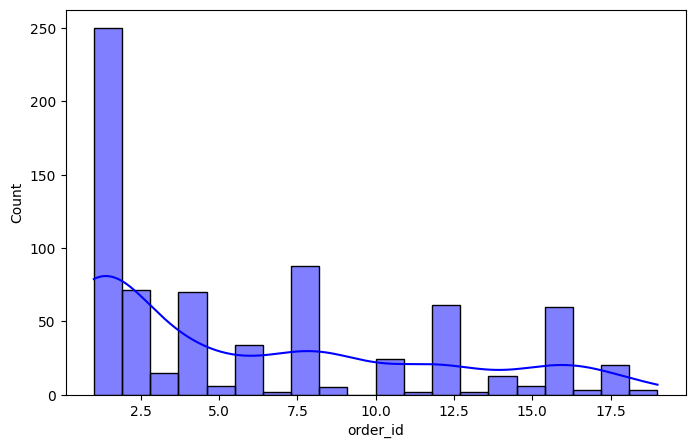

In [6]:
# CHecking for customer who has lesser that 20 orders.

# Fetching the order counts
less_order = EDA_data.groupby('customer_id')['order_id'].count()

# Sorting to find the minimum orders
less_order = less_order.sort_values(ascending=True)

# Filtering customers with less than 20:
less_order = less_order[less_order<20].reset_index()

plt.figure(figsize=(8,5))

sns.histplot(less_order['order_id'],kde=True,bins=20,color='blue')

plt.show()


**We see from the above that around 250 customer has orders lesser than 20.**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26800\1942781019.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=purchase_cost['customer_id'],


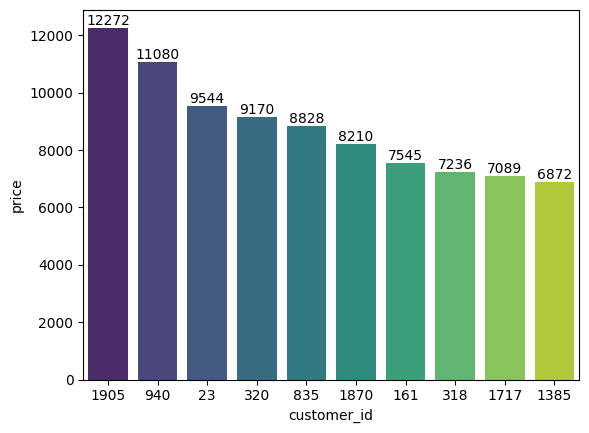

In [7]:
# Top 10 customer who has overall high purchase cost.

# Grouping the price by customer
purchase_cost = EDA_data.groupby('customer_id')['price'].sum().sort_values(ascending=False)

#FIlter the customer with highest price:
purchase_cost = purchase_cost.head(10).reset_index()

# Plotting the customer with high price:
sns.barplot(x=purchase_cost['customer_id'],
            y=purchase_cost['price'],
            palette='viridis',
            order=purchase_cost['customer_id'])
for i in range(len(purchase_cost)):
    plt.text(x=i,
             y=purchase_cost['price'][i],
             s= str(purchase_cost['price'][i]),
             ha='center', va='bottom')

**Observation: From the above visuals we see that customer id 1905 has te higher price in overall**

In [8]:
EDA_data.columns

Index(['customer_id', 'first_name', 'last_name', 'email', 'address_id',
       'address_status_id', 'street_number', 'street_name', 'city',
       'country_id', 'address_status', 'order_id', 'order_date',
       'shipping_method_id', 'dest_address_id', 'order_day', 'order_month',
       'order_year', 'order_month_name', 'method_name', 'cost', 'history_id',
       'status_id', 'status_date', 'hist_status_day', 'hist_status_month',
       'hist_status_year', 'order_status_id', 'status_value', 'line_id',
       'book_id', 'price', 'price_missing', 'cost_missing', 'title', 'isbn13',
       'language_id', 'num_pages', 'publication_date', 'publisher_id',
       'publish_day', 'publish_month', 'publish_year', 'author_id',
       'author_name', 'language_code', 'language_name', 'publisher_name',
       'last_order_date', 'recency', 'spending_of_customer',
       'total_no_of_order', 'has_order', 'Churn'],
      dtype='object')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26800\636507023.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year',y='number_of_orders',data=orders_per_year,palette='viridis')


   year  number_of_orders
0     0               358
1  2021              3149
2  2022             50889
3  2023             54828
4  2024             51118


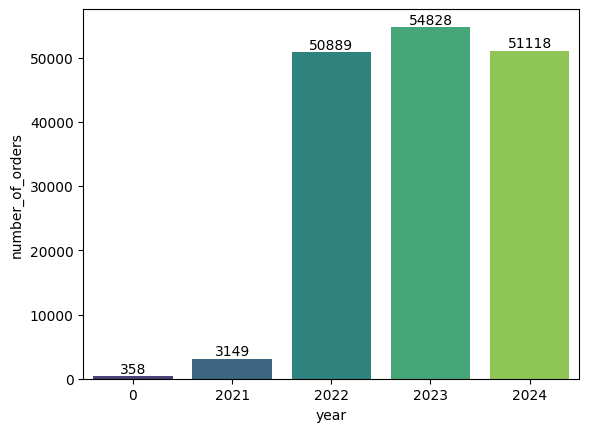

In [9]:
# CHecking which year has the highest order:

orders_per_year = EDA_data.groupby('order_year')['order_id'].count().reset_index()

# Renaming the column for better understanding
orders_per_year.columns = ['year', 'number_of_orders']
print(orders_per_year)

sns.barplot(x='year',y='number_of_orders',data=orders_per_year,palette='viridis')

# TO show the exact count above the bar:
for i in range(len(orders_per_year)):
    plt.text(x=i,
             y=orders_per_year['number_of_orders'][i],
             s=str(orders_per_year['number_of_orders'][i]),
             ha='center', va='bottom')
plt.show()

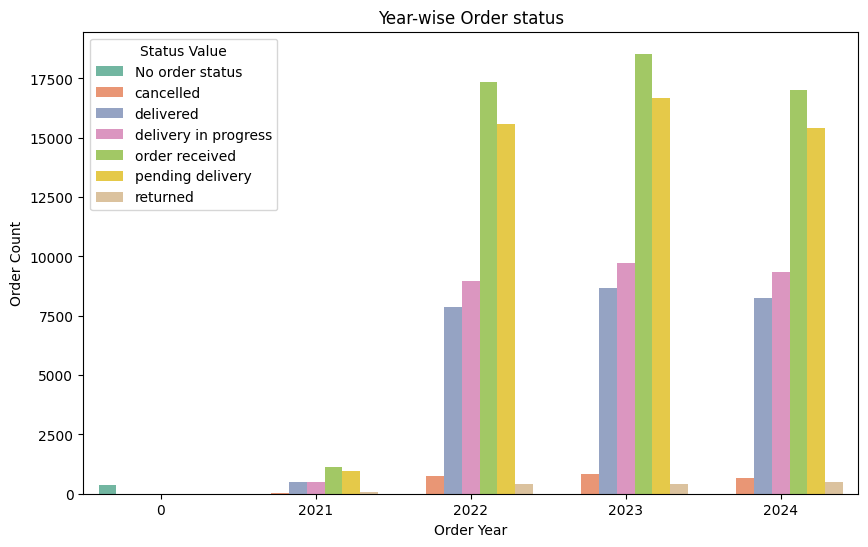

In [10]:
# Group by 'order_year' and 'status_value' and count the number of 'order_id'
status_year = EDA_data.groupby(['order_year', 'status_value'])['order_id'].count().reset_index()

# Rename the column for clarity
status_year.rename(columns={'order_id': 'order_count'}, inplace=True)

# Plot using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=status_year, x='order_year', y='order_count', hue='status_value', palette='Set2')

# Add labels and title
plt.xlabel('Order Year')
plt.ylabel('Order Count')
plt.title('Year-wise Order status')
plt.legend(title='Status Value')
plt.show()


**Observation :
1. 2023 has the highest oder received.
2. Order return, cancelled has less percentage.**

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26800\4290546341.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


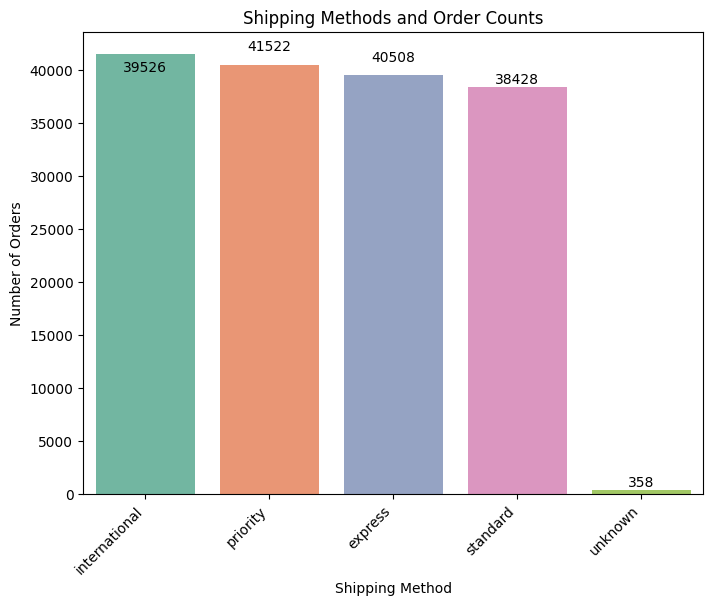

In [13]:
# FInding the shipping order delivered by shipping methods:

# Grouping data by 'method_name' and counting the orders
ship_meth = EDA_data.groupby('method_name')['order_id'].count().reset_index()

# Sorting data by order count in descending order
ship_meth = ship_meth.sort_values(by='order_id', ascending=False)

# Creating the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x='method_name',
    y='order_id',
    data=ship_meth,
    order=ship_meth['method_name'],
    palette='Set2'
)

# Adding axis labels and a title
plt.ylabel("Number of Orders")
plt.xlabel("Shipping Method")
plt.title("Shipping Methods and Order Counts")

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding numerical annotations on the bars
for i, row in ship_meth.iterrows():
    plt.text(
        x=i,
        y=row['order_id'] + 50,  # Position slightly above the bar
        s=row['order_id'],       # The order count value
        ha='center', va='bottom', fontsize=10, color='black'
    )


# Display the plot
plt.show()


In [14]:
EDA_data.columns

Index(['customer_id', 'first_name', 'last_name', 'email', 'address_id',
       'address_status_id', 'street_number', 'street_name', 'city',
       'country_id', 'address_status', 'order_id', 'order_date',
       'shipping_method_id', 'dest_address_id', 'order_day', 'order_month',
       'order_year', 'order_month_name', 'method_name', 'cost', 'history_id',
       'status_id', 'status_date', 'hist_status_day', 'hist_status_month',
       'hist_status_year', 'order_status_id', 'status_value', 'line_id',
       'book_id', 'price', 'price_missing', 'cost_missing', 'title', 'isbn13',
       'language_id', 'num_pages', 'publication_date', 'publisher_id',
       'publish_day', 'publish_month', 'publish_year', 'author_id',
       'author_name', 'language_code', 'language_name', 'publisher_name',
       'last_order_date', 'recency', 'spending_of_customer',
       'total_no_of_order', 'has_order', 'Churn'],
      dtype='object')

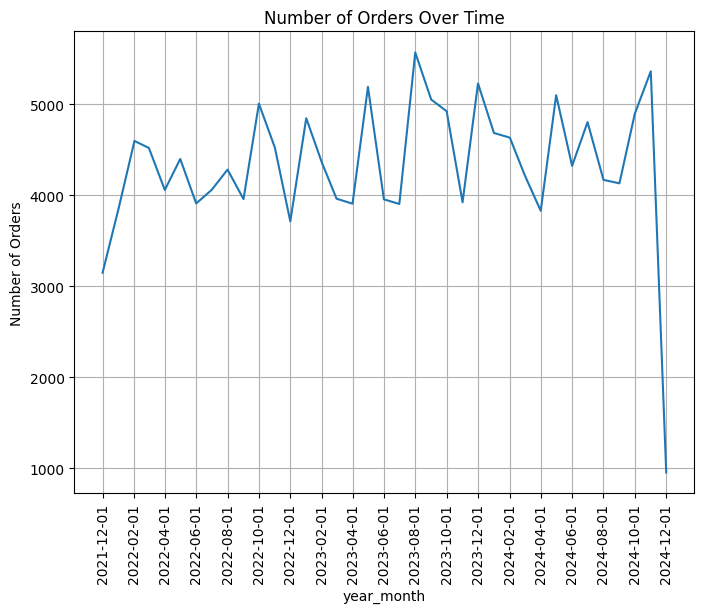

In [38]:

# Grouping data for year and month sales:
sale = EDA_data.groupby(['order_year', 'order_month'])['order_id'].count().reset_index()

# Create 'year_month' column with proper sorting

sale['year_month'] = pd.to_datetime(sale['order_year'].astype(str) + "-" + sale['order_month'].astype(str), format='%Y-%m',errors='coerce')

# Dropping NA from the data:
sale = sale.dropna(subset=['year_month'])

# Sort by 'year_month'
sale = sale.sort_values('year_month')

# Plotting
plt.figure(figsize=(8, 6))
sns.lineplot(x='year_month', y='order_id', data=sale)
plt.xticks(ticks=sale['year_month'][::2],rotation=90)
plt.ylabel("Number of Orders")
plt.title("Number of Orders Over Time")
plt.grid()
plt.show()


**Observation:
1. Major downfall in the December 2024.
2. Highest sale in August 2023.**

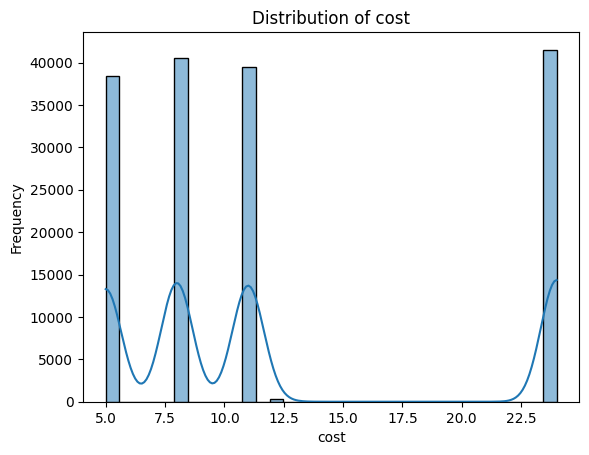

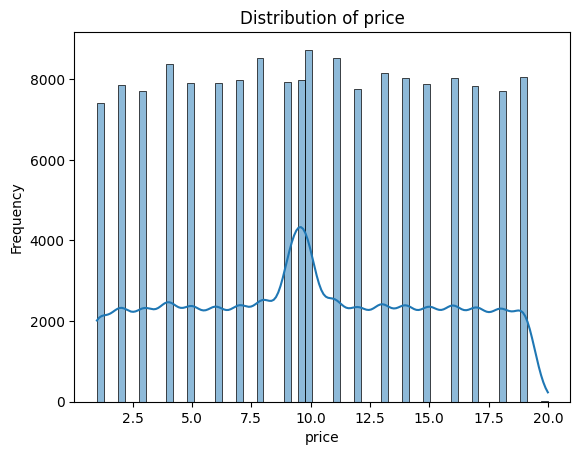

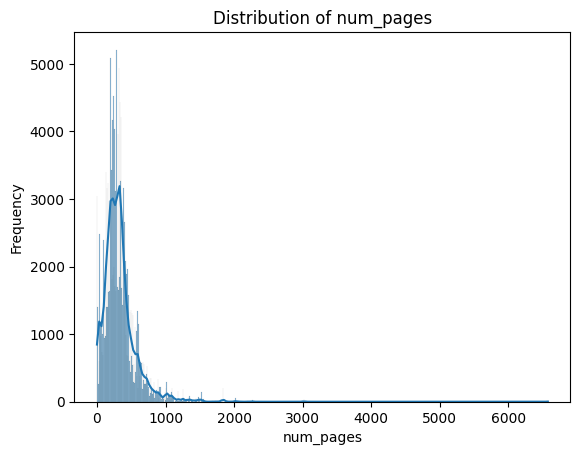

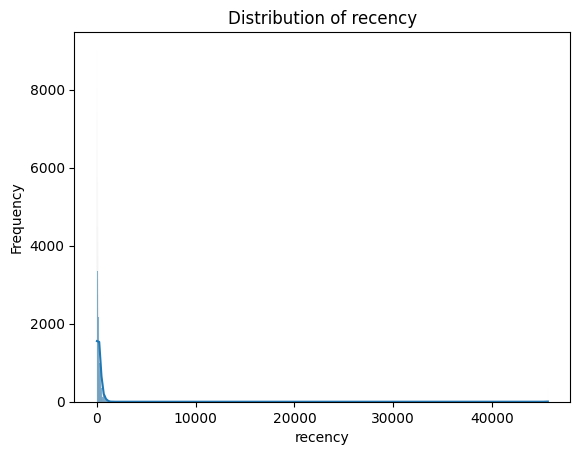

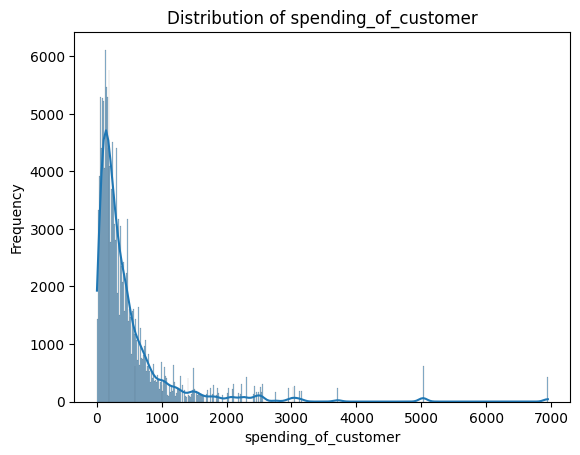

In [43]:
# Visualize distribution of numerical columns
numerical_cols = ['cost', 'price', 'num_pages', 'recency', 'spending_of_customer']

check_dist = EDA_data.copy()

# Replace 0 values with mean (if they are used as placeholders for missing data)
check_dist['cost'] = check_dist['cost'].replace(0, check_dist['cost'].mean())
check_dist['price'] = check_dist['price'].replace(0, check_dist['price'].mean())
check_dist['spending_of_customer'] = check_dist['spending_of_customer'].replace(0, check_dist['spending_of_customer'].mean())


for col in numerical_cols:
    sns.histplot(check_dist[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


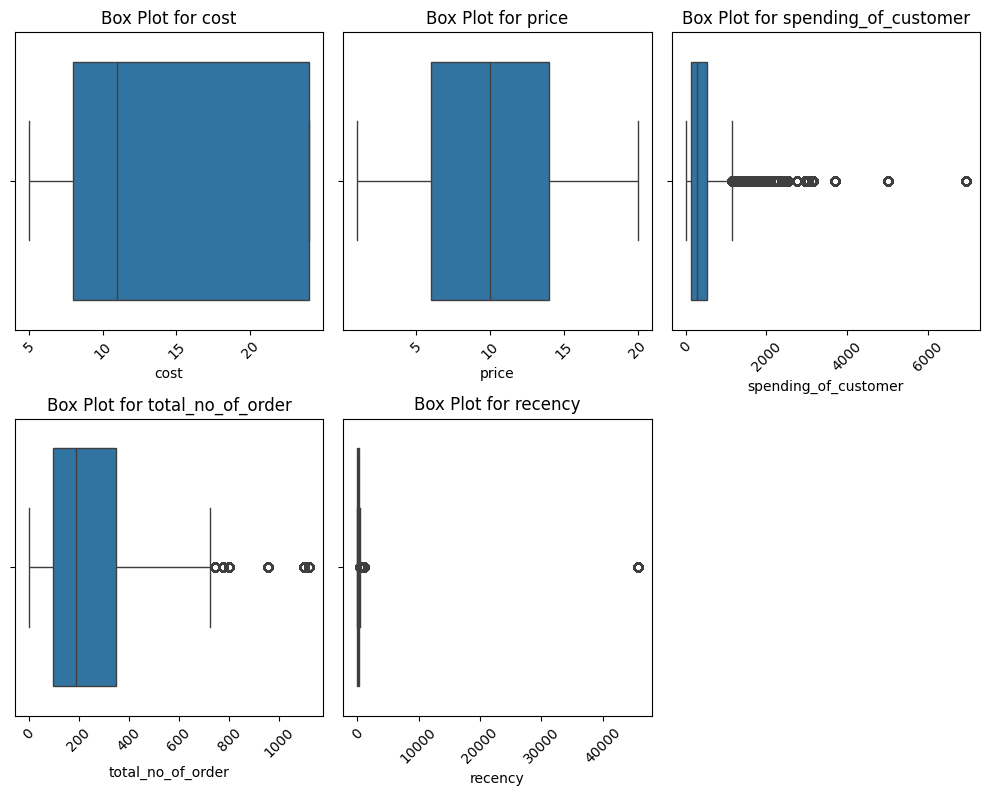

In [45]:
# List of numerical columns to check for outliers
numerical_columns = ['cost', 'price', 'spending_of_customer', 'total_no_of_order', 'recency']

# Create a box plot for each numerical column
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the layout as needed
    sns.boxplot(x=check_dist[col])
    plt.title(f"Box Plot for {col}")
    plt.tight_layout()
    plt.xticks(rotation=45)
plt.show()


In [63]:
from scipy.stats import zscore
import numpy as np

numerical_columns = ['cost', 'price', 'spending_of_customer', 'total_no_of_order', 'recency']

outliers_df = pd.DataFrame()

# Loop through numerical columns and calculate outliers
for col in numerical_columns:
    z_scores = zscore(check_dist[col])  # Calculate Z-scores
    
    # Identify outliers based on absolute Z-score > 3
    outliers = check_dist[np.abs(z_scores) > 3]  
    
    # Concatenate the identified outliers
    outliers_df = pd.concat([outliers_df, outliers])

# Remove duplicates in outliers_df (if a row was flagged as an outlier in multiple columns)
outliers_df = outliers_df.drop_duplicates()

# Reset the index of outliers_df to clean up the index
outliers_df.reset_index(drop=True, inplace=True)

# Remove outliers from the original DataFrame
clean_data = check_dist[~check_dist.index.isin(outliers_df.index)]

# Display the cleaned data
clean_data


,customer_id,first_name,last_name,email,address_id,address_status_id,street_number,street_name,city,country_id,address_status,order_id,order_date,shipping_method_id,dest_address_id,order_day,order_month,order_year,order_month_name,method_name,cost,history_id,status_id,status_date,hist_status_day,hist_status_month,hist_status_year,order_status_id,status_value,line_id,book_id,price,price_missing,cost_missing,title,isbn13,language_id,num_pages,publication_date,publisher_id,publish_day,publish_month,publish_year,author_id,author_name,language_code,language_name,publisher_name,last_order_date,recency,spending_of_customer,total_no_of_order,has_order,Churn
6655,84,gabriellia,eastway,geastway2b@yellowpages.com,9,2,83,graceland pass,castelo de vide,164,inactive,671,2022-02-11,4,206,11,2,2022,february,international,24.0,671,1,2022-02-11 21:22:27,11,2.0,2022,1,order received,305,11069,11.0,0,0,671,9789042003408,1,136,1998-01-01,317,1,1,1998,3276,helena grice,eng,english,brill/rodopi,2024-11-29,24,468.0,801,1,0
6656,84,gabriellia,eastway,geastway2b@yellowpages.com,9,2,83,graceland pass,castelo de vide,164,inactive,671,2022-02-11,4,206,11,2,2022,february,international,24.0,671,1,2022-02-11 21:22:27,11,2.0,2022,1,order received,305,11069,11.0,0,0,671,9789042003408,1,136,1998-01-01,317,1,1,1998,8650,tim woods,eng,english,brill/rodopi,2024-11-29,24,468.0,801,1,0
6657,84,gabriellia,eastway,geastway2b@yellowpages.com,9,2,83,graceland pass,castelo de vide,164,inactive,671,2022-02-11,4,206,11,2,2022,february,international,24.0,671,1,2022-02-11 21:22:27,11,2.0,2022,1,order received,14648,2190,17.0,0,0,671,9780307350503,4,336,2006-02-07,1555,7,2,2006,2798,gabriel garcía márquez,spa,spanish,plaza y janes,2024-11-29,24,468.0,801,1,0
6658,84,gabriellia,eastway,geastway2b@yellowpages.com,9,2,83,graceland pass,castelo de vide,164,inactive,671,2022-02-11,4,206,11,2,2022,february,international,24.0,11647,2,2022-02-13 11:40:12,13,2.0,2022,2,pending delivery,305,11069,11.0,0,0,671,9789042003408,1,136,1998-01-01,317,1,1,1998,3276,helena grice,eng,english,brill/rodopi,2024-11-29,24,468.0,801,1,0
6659,84,gabriellia,eastway,geastway2b@yellowpages.com,9,2,83,graceland pass,castelo de vide,164,inactive,671,2022-02-11,4,206,11,2,2022,february,international,24.0,11647,2,2022-02-13 11:40:12,13,2.0,2022,2,pending delivery,305,11069,11.0,0,0,671,9789042003408,1,136,1998-01-01,317,1,1,1998,8650,tim woods,eng,english,brill/rodopi,2024-11-29,24,468.0,801,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160337,2000,delora,bigglestone,dbigglestonerr@usatoday.com,693,1,7735,claremont point,comrat,129,active,10555,2024-05-22,4,99,22,5,2024,may,international,24.0,18029,3,2024-05-23 07:07:35,23,5.0,2024,3,delivery in progress,7550,1577,19.0,0,0,10555,9780143038184,1,304,2008-01-02,1476,2,1,2008,2951,george saunders,eng,english,penguin books,2024-10-31,53,1539.0,366,1,0
160338,2000,delora,bigglestone,dbigglestonerr@usatoday.com,693,1,7735,claremont point,comrat,129,active,10555,2024-05-22,4,99,22,5,2024,may,international,24.0,18029,3,2024-05-23 07:07:35,23,5.0,2024,3,delivery in progress,7550,1577,19.0,0,0,10555,9780143038184,1,304,2008-01-02,1476,2,1,2008,3190,hari kunzru,eng,english,penguin books,2024-10-31,53,1539.0,366,1,0
160339,2000,delora,bigglestone,dbigglestonerr@usatoday.com,693,1,7735,claremont point,comrat,129,active,10555,2024-05-22,4,99,22,5,2024,may,international,24.0,18029,3,2024-05-23 07:07:35,23,5.0,2024,3,delivery in progress,7550,1577,19.0,0,0,10555,9780143038184,1,304,2008-01-02,1476,2,1,2008,6461,nick hornby,eng,english,penguin books,2024-10-31,53,1539.0,366,1,0
160340,2000,delora,bigglestone,dbigglestonerr@usatoday.com,693,1,7735,claremont point,comrat,129,active,10555,2024-05-22,4,99,22,5,2024,may,international,24.0,18029,3,2024-05-23 07:07:35,23,5.0,2024,3,delivery in progress,7550

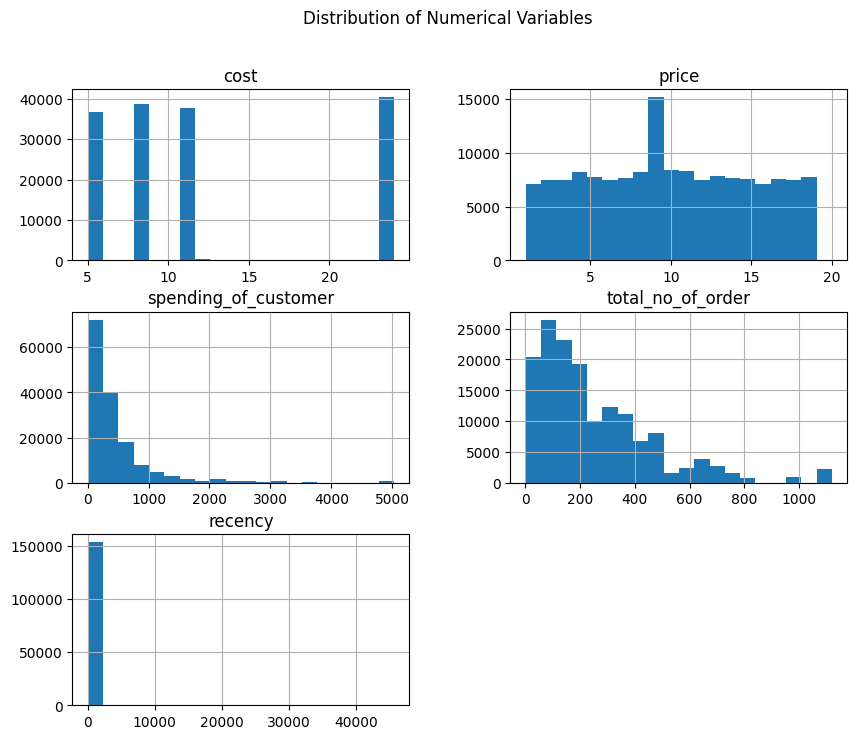

In [66]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
numerical_columns = ['cost', 'price', 'spending_of_customer', 'total_no_of_order', 'recency']

# Create a histogram for each numerical column
clean_data[numerical_columns].hist(bins=20, figsize=(10, 8))
plt.suptitle('Distribution of Numerical Variables')
plt.show()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26800\3976787302.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(clean_data['cost'], shade=True, label='Cost')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26800\3976787302.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(clean_data['price'], shade=True, label='Price')


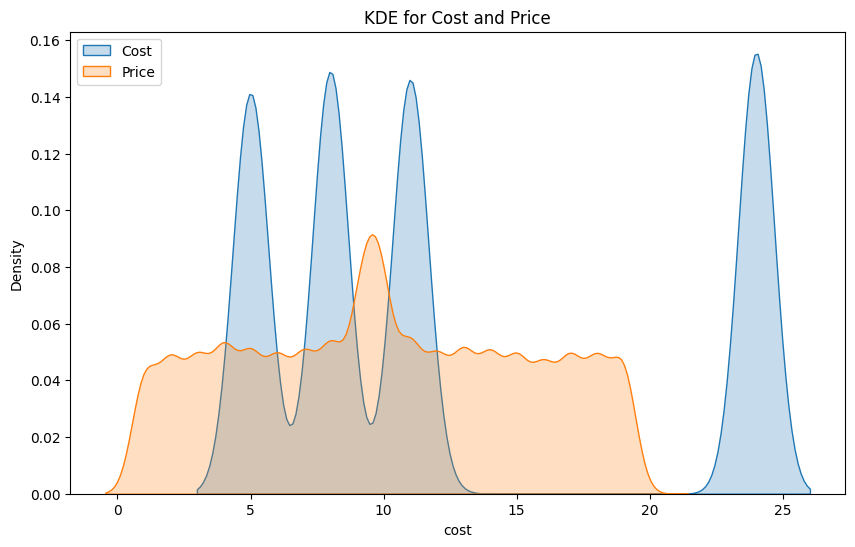

In [67]:
import seaborn as sns

# Plot KDE (Kernel Density Estimate) for numerical columns
plt.figure(figsize=(10, 6))
sns.kdeplot(clean_data['cost'], shade=True, label='Cost')
sns.kdeplot(clean_data['price'], shade=True, label='Price')
plt.title('KDE for Cost and Price')
plt.legend()
plt.show()



In [68]:
clean_data['spending_of_customer'] = np.log(clean_data['spending_of_customer'] + 1)
clean_data['cost'] = np.log(clean_data['cost'] + 1)
clean_data['price'] = np.log(clean_data['price'] + 1)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26800\906358937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['spending_of_customer'] = np.log(clean_data['spending_of_customer'] + 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26800\906358937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['cost'] = np.log(clean_data['cost'] + 1)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26800\906358937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26800\3976787302.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(clean_data['cost'], shade=True, label='Cost')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_26800\3976787302.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(clean_data['price'], shade=True, label='Price')


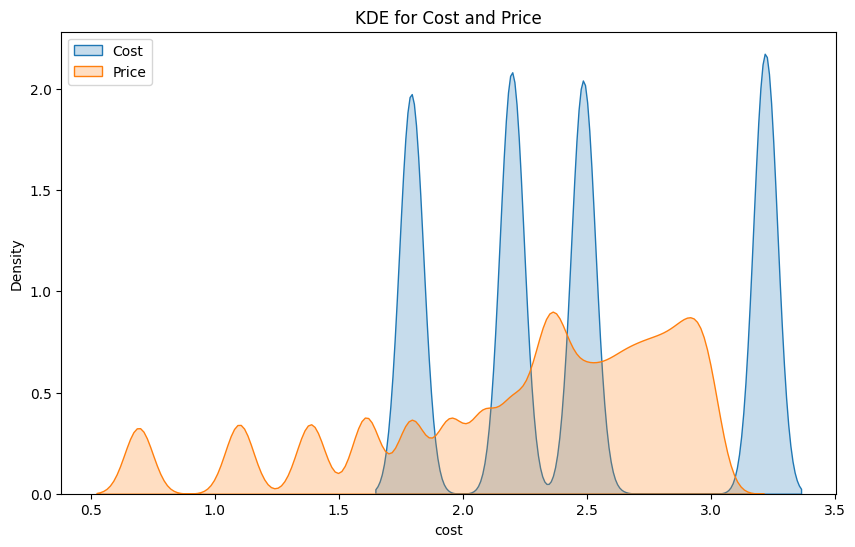

In [69]:
import seaborn as sns

# Plot KDE (Kernel Density Estimate) for numerical columns
plt.figure(figsize=(10, 6))
sns.kdeplot(clean_data['cost'], shade=True, label='Cost')
sns.kdeplot(clean_data['price'], shade=True, label='Price')
plt.title('KDE for Cost and Price')
plt.legend()
plt.show()



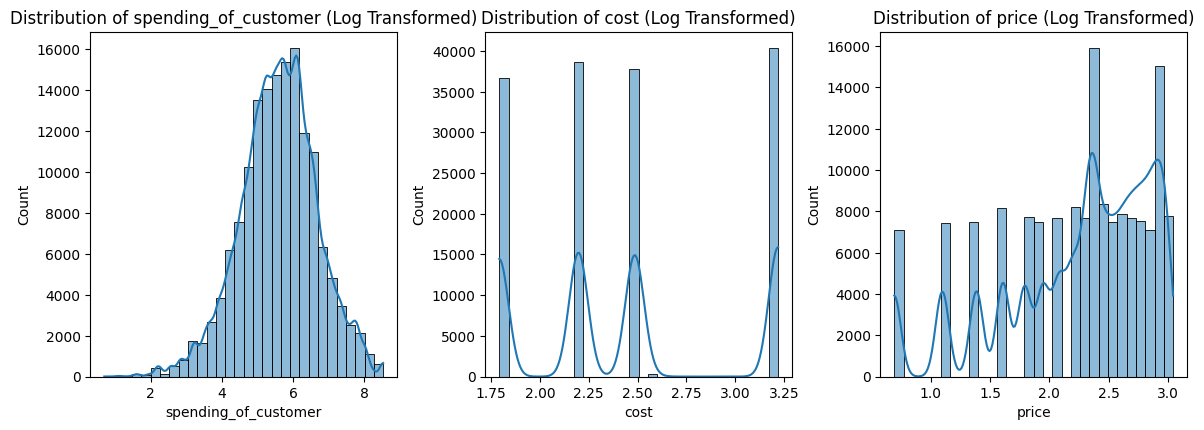

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions after log transformation
plt.figure(figsize=(12, 8))

for i, col in enumerate(['spending_of_customer', 'cost', 'price'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(clean_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col} (Log Transformed)')

plt.tight_layout()
plt.show()


In [72]:
# Try this

# Calculate the 1st and 99th percentile
lower_limit = check_dist['column_name'].quantile(0.01)
upper_limit = check_dist['column_name'].quantile(0.99)

# Replace outliers with the nearest threshold value
check_dist['column_name'] = check_dist['column_name'].clip(lower=lower_limit, upper=upper_limit)


SyntaxError: invalid syntax (3379292790.py, line 1)